**The idea is build a CNN for clasificate images of the dataset "cifar10", the which content cars, boats, airplanes, etc.**

In [1]:
#Packages:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Load the data:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [3]:
x_train.shape #I have 50000 images of train where every one have resolution of 32x32 and is in RGB space color

(50000, 32, 32, 3)

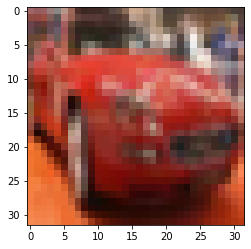

In [4]:
#Painting a image:
plt.imshow(x_train[5])

#Preprocessing:

In [5]:
#Normalizing the images with MinMaxScaler:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [6]:
len(np.unique(y_train)) #I have only 10 classes

10

In [7]:
#Binarizing the labels:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [9]:
#Train_test_val_split:
(x_train,x_valid)=x_train[5000:],x_train[:5000]
(y_train,y_valid)=y_train[5000:],y_train[:5000]

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((45000, 32, 32, 3), (45000, 10), (5000, 32, 32, 3), (5000, 10))

#Building the model

In [10]:
base_filtros=32 #Number of Kernels in the convolutional layers
w_regularizer=1e-4 #weight of the relularizer

In [11]:
from keras.api._v2.keras import regularizers
model=Sequential()

#First convolution layer:
model.add(Conv2D(base_filtros,(3,3),padding="same",kernel_regularizer=regularizers.l2(w_regularizer), input_shape=(32,32,3))) #put a regularizer with l2
model.add(Activation("relu")) #Put a Activation layer of type relu

#Second convolution layer:
model.add(Conv2D(base_filtros,(3,3),padding="same",kernel_regularizer=regularizers.l2(w_regularizer))) #put a regularizer with l2
model.add(Activation("relu")) #Put a Activation layer of type relu
model.add(MaxPooling2D(pool_size=(2,2))) #First MaxPooling Layer
model.add(Dropout(0.2))


#Convolution layer number 3 (Iqual but increase the number of kernels):
model.add(Conv2D(2*base_filtros,(3,3),padding="same",kernel_regularizer=regularizers.l2(w_regularizer))) #put a regularizer with l2
model.add(Activation("relu")) #Put a Activation layer of type relu
model.add(Dropout(0.2))


#Convolution layer number 4:
model.add(Conv2D(2*base_filtros,(3,3),padding="same",kernel_regularizer=regularizers.l2(w_regularizer))) #put a regularizer with l2
model.add(Activation("relu")) #Put a Activation layer of type relu
model.add(MaxPooling2D(pool_size=(2,2))) #Second MaxPooling Layer
model.add(Dropout(0.3))



#Convolution layer number 5 (increase the number of kernels):
model.add(Conv2D(4*base_filtros,(3,3),padding="same",kernel_regularizer=regularizers.l2(w_regularizer))) #put a regularizer with l2
model.add(Activation("relu")) #Put a Activation layer of type relu

#Convolution layer number 6:
model.add(Conv2D(4*base_filtros,(3,3),padding="same",kernel_regularizer=regularizers.l2(w_regularizer))) #put a regularizer with l2
model.add(Activation("relu")) #Put a Activation layer of type relu
model.add(MaxPooling2D(pool_size=(2,2))) #MaxPooling Layer Number three
model.add(Dropout(0.4))

#Classifiation (with dense layer) and Flatten:
model.add(Flatten())
model.add(Dense(10,activation="softmax"))


In [12]:
#architecture of the model:
model.summary() #Efectly the convolution layers increase the depth of my tensor and the pooling layer decrease the resolution of my tensor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

In [13]:
#Compile the model:
model.compile(metrics=["accuracy"],loss="categorical_crossentropy",optimizer="rmsprop")

In [14]:
#Training the model:
history=model.fit(x_train,y_train,batch_size=32,epochs=100,validation_data=(x_valid,y_valid),verbose=2,shuffle=True)

Epoch 1/100
1407/1407 - 21s - loss: 1.7183 - accuracy: 0.3814 - val_loss: 1.4005 - val_accuracy: 0.5098 - 21s/epoch - 15ms/step
Epoch 2/100
1407/1407 - 9s - loss: 1.2656 - accuracy: 0.5659 - val_loss: 1.1590 - val_accuracy: 0.6136 - 9s/epoch - 6ms/step
Epoch 3/100
1407/1407 - 9s - loss: 1.0886 - accuracy: 0.6398 - val_loss: 1.0647 - val_accuracy: 0.6626 - 9s/epoch - 6ms/step
Epoch 4/100
1407/1407 - 9s - loss: 0.9899 - accuracy: 0.6812 - val_loss: 0.8401 - val_accuracy: 0.7282 - 9s/epoch - 6ms/step
Epoch 5/100
1407/1407 - 9s - loss: 0.9339 - accuracy: 0.7041 - val_loss: 1.0163 - val_accuracy: 0.6638 - 9s/epoch - 6ms/step
Epoch 6/100
1407/1407 - 9s - loss: 0.8981 - accuracy: 0.7216 - val_loss: 0.8367 - val_accuracy: 0.7466 - 9s/epoch - 6ms/step
Epoch 7/100
1407/1407 - 9s - loss: 0.8729 - accuracy: 0.7316 - val_loss: 0.9805 - val_accuracy: 0.6948 - 9s/epoch - 7ms/step
Epoch 8/100
1407/1407 - 10s - loss: 0.8620 - accuracy: 0.7367 - val_loss: 0.7516 - val_accuracy: 0.7760 - 10s/epoch - 7ms/

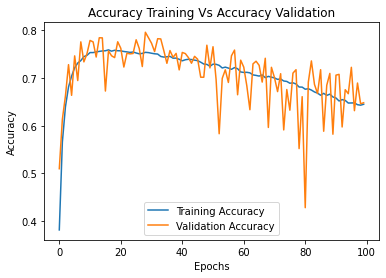

In [15]:
#Plotting the accuracy:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Training Vs Accuracy Validation")
plt.legend(loc="best")

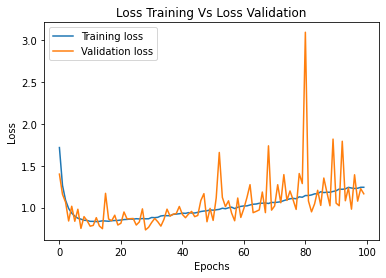

In [16]:
#Plotting the loss:
plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Training Vs Loss Validation")
plt.legend(loc="best")

In [17]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1818 - accuracy: 0.6421


[1.1817926168441772, 0.6420999765396118]

**How we can see, the performance is not very good**